In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

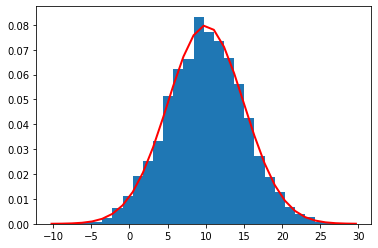

In [17]:
mu, sigma = 10, 5 # mean and standard deviation
ST = np.random.normal(mu, sigma, 10000)
count, bins, ignored = plt.hist(ST, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

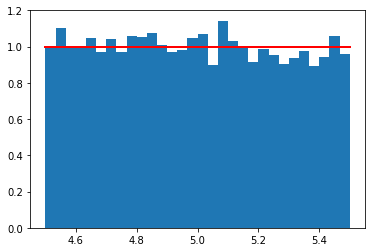

In [18]:
Iat = np.random.uniform(4.5,5.5,10000)
import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(Iat, 30, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

In [19]:
Iat.mean()

4.992454651253889

In [48]:
dataset = pd.DataFrame({'InterArrival Time': list(Iat)}, columns=['InterArrival Time'])

In [49]:
dataset["Arrival Time"] = 0.0
dataset["Waiting Time"] = 0.0 
dataset["Time at Service"] = 0.0
dataset["Service Time"] = list(ST)
dataset["Departure Time"] = 0.0
dataset["Queue Length"] = 0.0

In [50]:
dataset

,InterArrival Time,Arrival Time,Waiting Time,Time at Service,Service Time,Departure Time,Queue Length
0,5.256391,0.0,0.0,0.0,9.513840,0.0,0.0
1,4.863213,0.0,0.0,0.0,14.319902,0.0,0.0
2,5.344828,0.0,0.0,0.0,20.335467,0.0,0.0
3,5.440793,0.0,0.0,0.0,10.388150,0.0,0.0
4,4.802330,0.0,0.0,0.0,13.379097,0.0,0.0
...,...,...,...,...,...,...,...
9995,4.800180,0.0,0.0,0.0,12.966196,0.0,0.0
9996,5.357028,0.0,0.0,0.0,6.052881,0.0,0.0
9997,5.137238,0.0,0.0,0.0,14.677252,0.0,0.0
9998,5.397710,0.0,0.0,0.0,3.357871,0.0,0.0


In [51]:
#dataset["Arrival Time"] = 0.0
Iat_prev = 0.0
for i in range(0,10000):
    dataset["Arrival Time"][i]= dataset["InterArrival Time"][i] + Iat_prev
    Iat_prev = dataset["Arrival Time"][i]

In [52]:
#dataset["Departure Time"] = 0.0
dataset["Departure Time"][0] =  dataset["Arrival Time"][0] + dataset["Service Time"][0] 
for i in range(1,10000):
    if dataset["Departure Time"][i - 1] > dataset["Arrival Time"][i]:
        dataset["Departure Time"][i]= dataset["Departure Time"][i - 1] + dataset["Service Time"][i]
    else:
        dataset["Departure Time"][i]= dataset["Arrival Time"][i] + dataset["Service Time"][i]

In [53]:
dataset

,InterArrival Time,Arrival Time,Waiting Time,Time at Service,Service Time,Departure Time,Queue Length
0,5.256391,5.256391,0.0,0.0,9.513840,14.770231,0.0
1,4.863213,10.119604,0.0,0.0,14.319902,29.090133,0.0
2,5.344828,15.464432,0.0,0.0,20.335467,49.425599,0.0
3,5.440793,20.905226,0.0,0.0,10.388150,59.813750,0.0
4,4.802330,25.707555,0.0,0.0,13.379097,73.192847,0.0
...,...,...,...,...,...,...,...
9995,4.800180,49903.409418,0.0,0.0,12.966196,99681.082882,0.0
9996,5.357028,49908.766446,0.0,0.0,6.052881,99687.135763,0.0
9997,5.137238,49913.903685,0.0,0.0,14.677252,99701.813015,0.0
9998,5.397710,49919.301395,0.0,0.0,3.357871,99705.170886,0.0


In [54]:
#dataset["Waiting Time"] = 0.0 
#dataset["Time at Service"] = 0.0
dataset["Time at Service"][0] =  dataset["Arrival Time"][0] 
for i in range(1,10000):
    if dataset["Departure Time"][i - 1] > dataset["Arrival Time"][i]: 
        dataset["Time at Service"][i]= dataset["Departure Time"][i - 1]
        dataset["Waiting Time"][i] = dataset["Departure Time"][i - 1] - dataset["Arrival Time"][i]
    else:
        dataset["Time at Service"][i]= dataset["Arrival Time"][i]
        dataset["Waiting Time"][i] = 0.0

In [55]:
#dataset["Queue Length"] = 0.0
dataset["Queue Length"][0] = 0.0
for i in range(1,100):
    at_i = dataset["Time at Service"][i]
    for j in range(i + 1,100):
        if(at_i < dataset["Arrival Time"][j]):
            break
        else:
            dataset["Queue Length"][i] = dataset["Queue Length"][i] + 1

In [57]:
dataset.head(10)

,InterArrival Time,Arrival Time,Waiting Time,Time at Service,Service Time,Departure Time,Queue Length
0,5.256391,5.256391,0.000000,5.256391,9.513840,14.770231,0.0
1,4.863213,10.119604,4.650627,14.770231,14.319902,29.090133,0.0
2,5.344828,15.464432,13.625701,29.090133,20.335467,49.425599,2.0
3,5.440793,20.905226,28.520374,49.425599,10.388150,59.813750,5.0
4,4.802330,25.707555,34.106195,59.813750,13.379097,73.192847,6.0
5,5.487641,31.195196,41.997651,73.192847,9.650219,82.843066,8.0
6,4.994893,36.190089,46.652977,82.843066,11.516147,94.359212,9.0
7,5.246669,41.436758,52.922454,94.359212,3.423761,97.782973,11.0
8,4.581364,46.018122,51.764851,97.782973,12.990130,110.773103,10.0
9,4.559873,50.577995,60.195109,110.773103,11.616548,122.389651,12.0


In [ ]:
util = sum(dataset["Service Time"])/dataset["Departure Time"][999]

In [ ]:
util